# Effects of Covid on Crime Rate in New Zealand

### Group Project
### Group member: PEI(Perry) LI, ZAHID KHAN, Kaishun(Ted) Yang Jiani Wu

In [24]:
# Import libraries 
library(visdat)
library(tidyverse)
library(readxl)
library(dplyr)
library(tidytext)
library(textdata)
library(rvest) # to scrape data from websites
library(xml2) # to effctively work with HTML or XML in R
library(magrittr) 
library(maps)
library(rgeos)
library(sf)

In [25]:
# Adding width and height of plots for better illustration 
options(repr.plot.width=15, repr.plot.height=8)

# Covid Dataset
https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/weekly-deaths.csvhttps://raw.githubusercontent.com/minhealthnz/nz-covid-data/
> We'll read the data straight from the ministry of Health git repository, that way if the data is updated, we'll get the latest dataset for covid cases from 2020 till todate.

In [26]:
covid_cases_data = read_csv("https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/covid-cases.csv", col_names = TRUE)

Rows: 1828044 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Case Status, Sex, Age group, DHB, Overseas travel
lgl  (1): Historical
date (1): Report Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
# Check the data type in covid cases data
covid_cases_data %>% tail()

Report Date,Case Status,Sex,Age group,DHB,Overseas travel,Historical
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
2020-03-05,Probable,Male,70 to 79,Managed Isolation & Quarantine,Yes,NA
2020-03-05,Probable,Female,70 to 79,Managed Isolation & Quarantine,Yes,NA
2020-03-04,Confirmed,Male,40 to 49,Managed Isolation & Quarantine,Yes,NA
2020-03-04,Confirmed,Male,40 to 49,Counties Manukau,NA,NA
2020-03-02,Confirmed,Female,30 to 39,Managed Isolation & Quarantine,Yes,NA
2020-02-26,Confirmed,Female,60 to 69,Managed Isolation & Quarantine,Yes,NA


> Rename the names of the columns to make them more descriptive, and types of the data so it makes it easier to manipulate

In [28]:
# Change Report Date to Date for convenience
covid_cases_data %>% arrange('Report Date') %>% head()
colnames(covid_cases_data)[1] <- "Date"
covid_cases_data1 <- covid_cases_data
colnames(covid_cases_data1)[1] <- "Date"

Report Date,Case Status,Sex,Age group,DHB,Overseas travel,Historical
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
2022-10-21,Confirmed,Female,60 to 69,Wairarapa,NA,NA
2022-10-21,Confirmed,Female,20 to 29,Auckland,NA,NA
2022-10-21,Confirmed,Female,80 to 89,Tairawhiti,NA,NA
2022-10-21,Confirmed,Male,30 to 39,Waitemata,NA,NA
2022-10-21,Confirmed,Male,60 to 69,MidCentral,NA,NA
2022-10-21,Confirmed,Male,80 to 89,Capital & Coast/Hutt,NA,NA


In [29]:
# covid_cases_data1$Date <- as.character(covid_cases_data1$Date)
# covid_cases_data1 %<>%
#     separate(Date, c("Year","Month", "Day"), "-")

> after getting the data for COVID, we filtered the data to only keep the data where COVID case is confirmted and then group the data by date and get the total number of cases on that day/date.

In [30]:
# Get the test cases by date 
summarise_data_by_date <- covid_cases_data %>% filter(covid_cases_data$"Case Status" == "Confirmed") %>% 
    group_by(Date) %>% summarise(total_cases = n())
summarise_data_by_date

Date,total_cases
<date>,<int>
2020-02-26,1
2020-03-02,1
2020-03-04,2
2020-03-06,1
2020-03-12,1
2020-03-13,1
2020-03-14,1
2020-03-15,1
2020-03-16,7


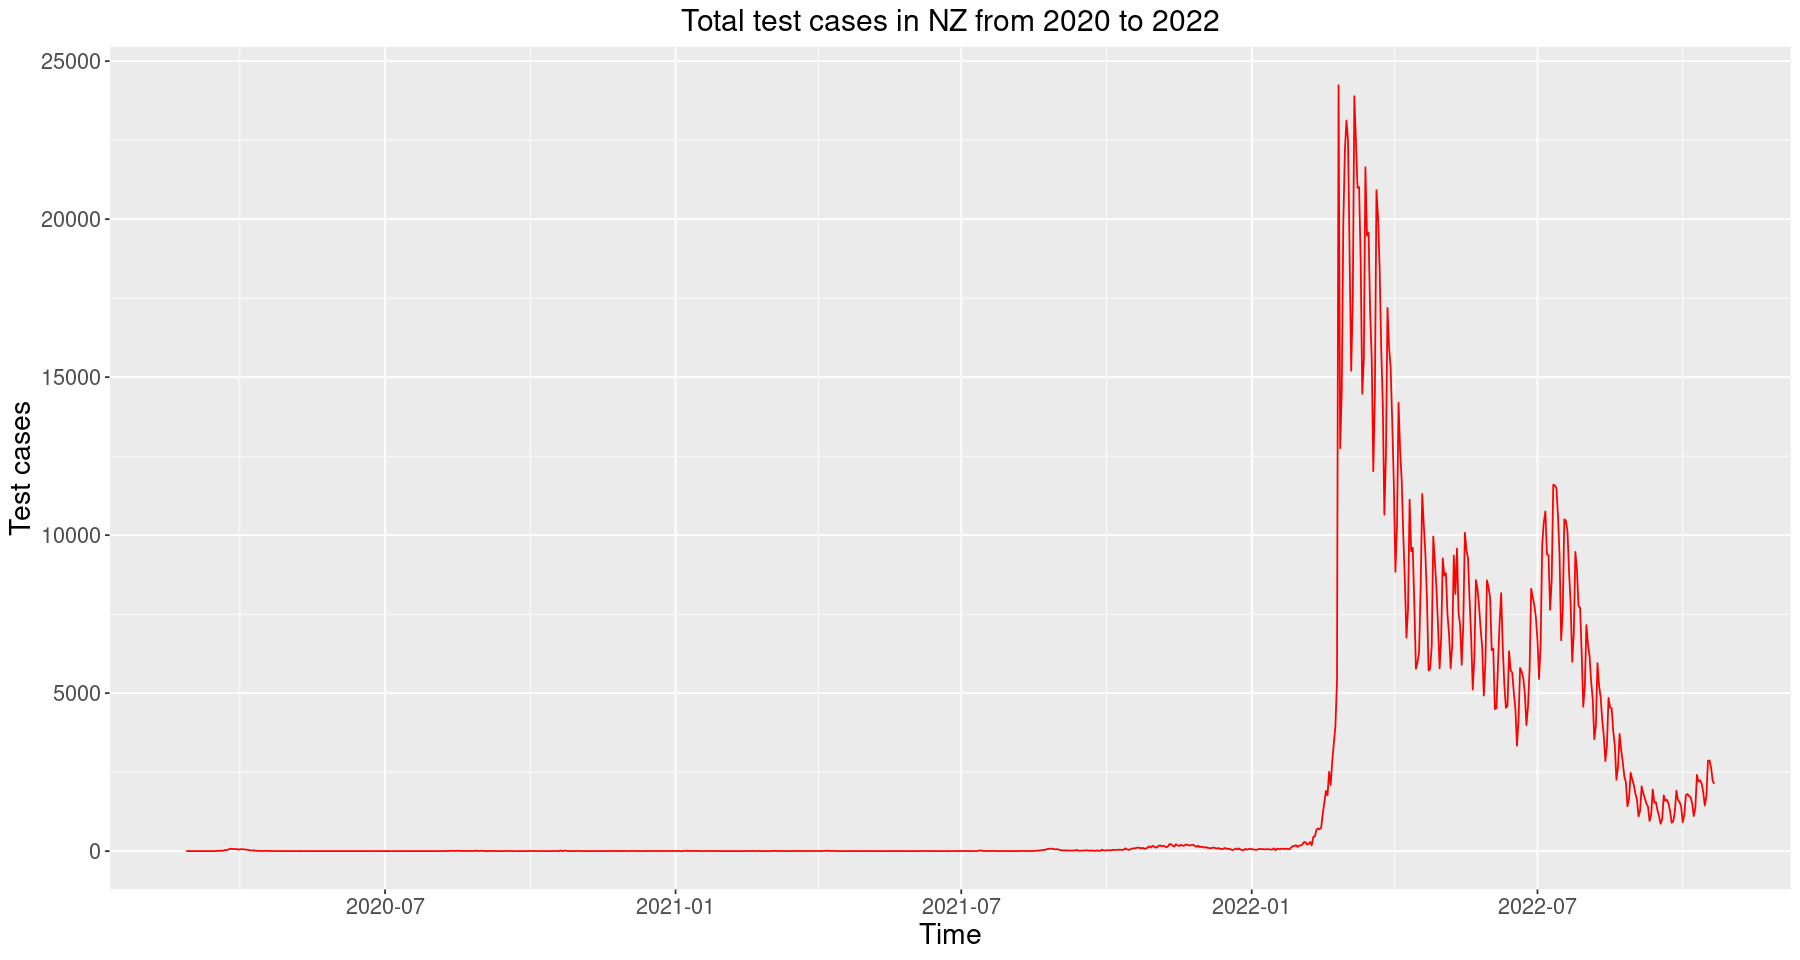

In [31]:
# Create the graph of test cases from 2020 to 2022
test_data_graph_by_date <- summarise_data_by_date %>% 
        ggplot(aes(x=Date, y=total_cases)) + 
        ggtitle('Total test cases in NZ from 2020 to 2022') + 
        geom_line(position = position_dodge(0.2), color="red") +
        # geom_point(position = position_dodge(0.2), size=2) +
        # geom_text(aes(label= total_cases), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(size=13),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Test cases")
test_data_graph_by_date

In [32]:
# ggsave(filename = "Total test cases in NZ from 2020 to 2022.png", test_data_graph_by_date,width = 70, height = 40, units = "cm")

> Now we want the number of cases per region, so we will grou the data by region

In [33]:
# now sorted test cases by districts
summarise_data_by_city <- covid_cases_data %>% group_by(DHB) %>% summarise(total_cases = n())

> The region boundary for DHB and NZ police is different and they use different names. So, to combine the datasets we need to have the same region names in both datasets.
We change the names of the regions to match the crime dataset.

In [34]:
summarise_data_by_city[summarise_data_by_city == "Auckland"] <- "Auckland City"
summarise_data_by_city[summarise_data_by_city == "Bay of Plenty"] <- "Bay Of Plenty"
summarise_data_by_city[summarise_data_by_city == "Canterbury/West Coast"] <- "Canterbury"
summarise_data_by_city[summarise_data_by_city == "MidCentral"] <- "Central"
summarise_data_by_city[summarise_data_by_city == "Counties Manukau"] <- "Counties/Manukau"
summarise_data_by_city[summarise_data_by_city == "Hawke's Bay"] <- "Eastern"
summarise_data_by_city[summarise_data_by_city == "Nelson Marlborough"] <- "Tasman"
summarise_data_by_city[summarise_data_by_city == "Capital & Coast/Hutt"] <- "Wellington"
colnames(summarise_data_by_city)[1] <- "district"
summarise_data_by_city

district,total_cases
<chr>,<int>
Auckland City,174086
Bay Of Plenty,83350
Canterbury,250364
Wellington,188052
Counties/Manukau,210525
Eastern,62624
Lakes,37263
Managed Isolation & Quarantine,27210
Central,64978


# Crime Dataset 

Crime data was collected from the police NZ statistics website using the following URL:
https://www.police.govt.nz/about-us/publications-statistics/data-and-statistics?nondesktop

> In the code snippet below we read the CrimeByRegion dataset we downloaded from NZ police website. After reading the data, we renames the column names to be more descriptive and then divide the dataset into before and after covid, group the data by region to show total number of reported crimes in that region. 

In [35]:
# Read and tidy the crime rate data
crime_by_region <- read_csv("../Data/CrimeByRegion.csv", show_col_types = FALSE)
# crime_by_region
colnames(crime_by_region) <- c("district", "year", "proceedings")
# Categories the year into before and after covid
crime_by_region_bf <- crime_by_region %>% 
            filter(year < "2020") %>% 
            group_by(district) %>%
            summarize(proceedings = sum(proceedings))
crime_by_region_bf

crime_by_region_af <- crime_by_region %>% 
            filter(year >= "2020") %>% 
            group_by(district) %>%
            summarize(proceedings = sum(proceedings))
crime_by_region_af

district,proceedings
<chr>,<dbl>
Auckland City,21672
Bay Of Plenty,28762
Canterbury,25361
Central,25002
Counties/Manukau,32979
Eastern,19569
Northland,12118
Not Specified (District),8
PNHQ Licensing (District),1


district,proceedings
<chr>,<dbl>
Auckland City,27940
Bay Of Plenty,39348
Canterbury,33079
Central,34299
Counties/Manukau,40925
Eastern,25975
Northland,16668
Not Specified (District),11
Southern,22049


> We created a sigle table by combining the data, and adding a new column specifing if that row shows the data for before or after covid, which can be used to filter the data. And, we added the total number of cases in each region to the data to help us compare the crime rate and number of COVID cases.

In [36]:
# Add test cases
test_crime_bf_table <- merge(crime_by_region_bf, summarise_data_by_city, by="district")
test_crime_bf_table %<>% mutate(period = "Before")
# test_crime_bf_table
test_crime_af_table <- merge(crime_by_region_af, summarise_data_by_city, by="district")
test_crime_af_table %<>% mutate(period = "After")
# test_crime_af_table
total_crime_data_table <- test_crime_bf_table %>% rbind(test_crime_af_table)
# total_crime_data_table %<>% mutate(change_rate = round((proceedings_postcovid-proceedings_precovid)/proceedings_postcovid*100, 2))
# total_crime_data_table$proceedings%>%typeof()
# total_crime_data_table$total_cases%>%typeof()
total_crime_data_table

district,proceedings,total_cases,period
<chr>,<dbl>,<int>,<chr>
Auckland City,21672,174086,Before
Bay Of Plenty,28762,83350,Before
Canterbury,25361,250364,Before
Central,25002,64978,Before
Counties/Manukau,32979,210525,Before
Eastern,19569,62624,Before
Northland,12118,55190,Before
Southern,17023,133005,Before
Tasman,10673,54097,Before


> The graph below shows the relation between COVID cases and the crime-rate before and after covid, Blue bar represents the total number of cases in each region, green bar represents the crime-rate before COVID (2020), and red bar represents the crime-rate during and after covid (2020 and after). We can clearly see that the crime-rate in every region has gone up. 

Warning message:
“position_dodge requires non-overlapping x intervals”


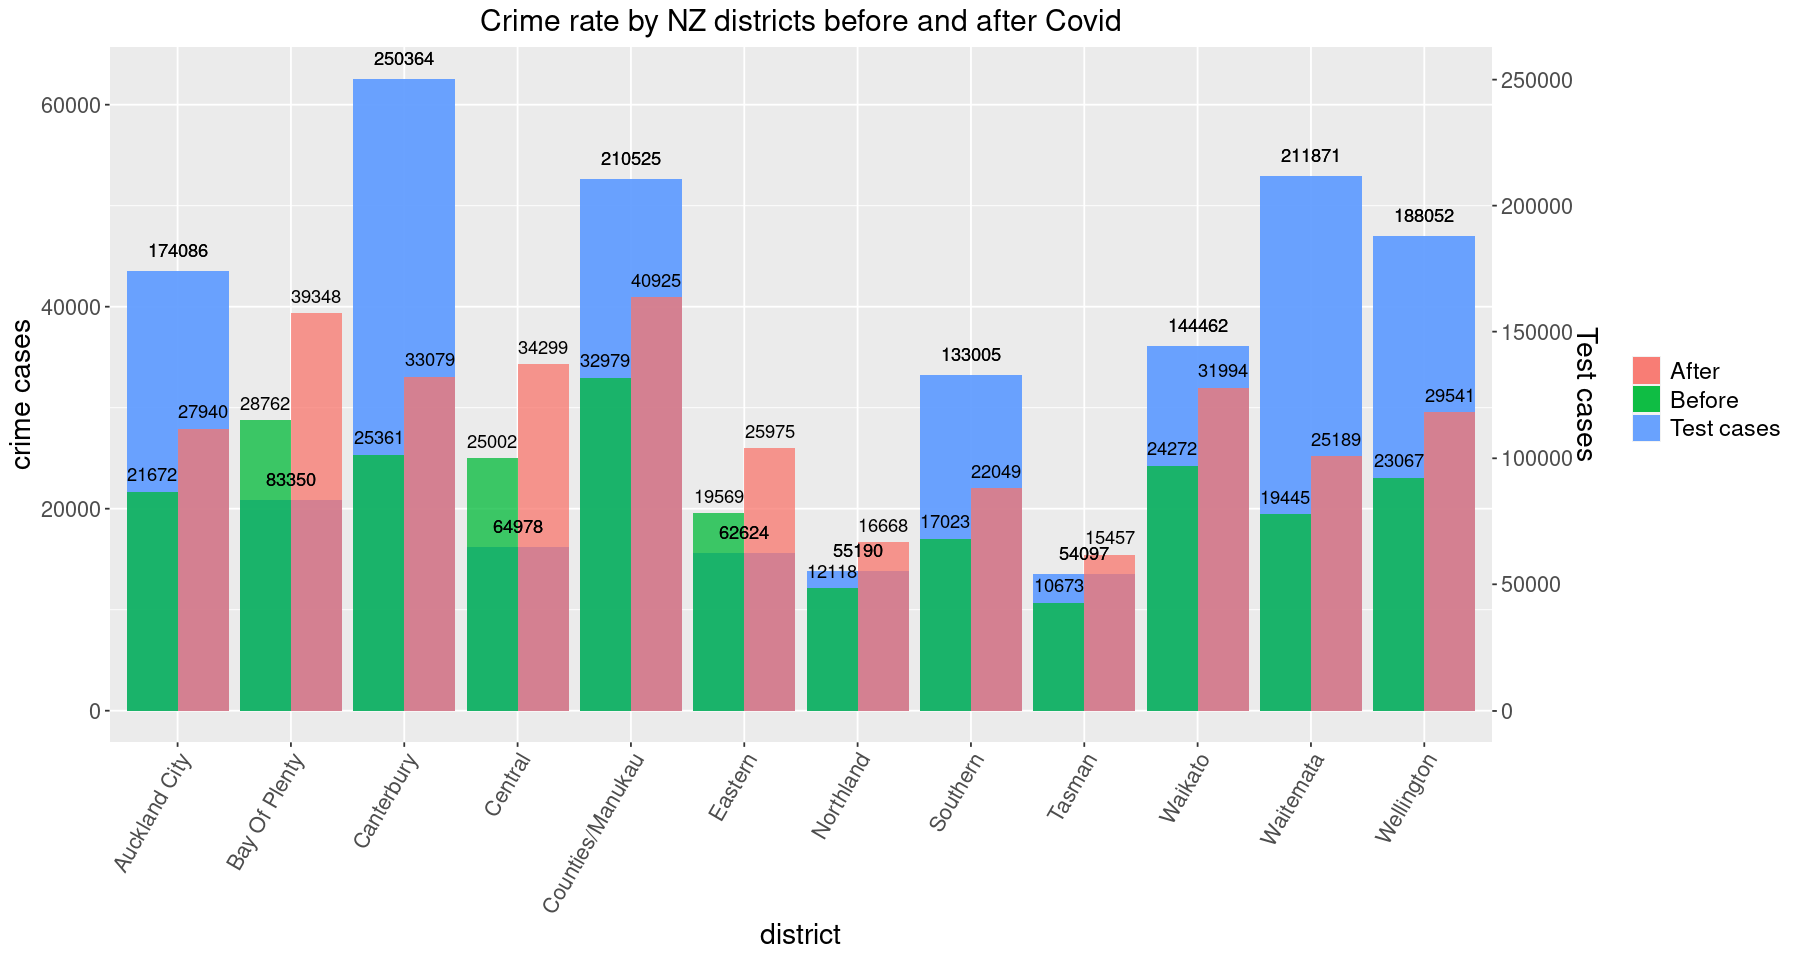

In [37]:
# build a multi bar chart to show the crime rate and test cases by different districts. 
# The left y axis is crime cases and right one is the test cases
total_crime_data_graph <- total_crime_data_table %>%
        ggplot(aes(x=district)) + 
        ggtitle('Crime rate by NZ districts before and after Covid') + 
        geom_bar(aes(y=total_cases/4, fill="Test cases"), stat = "identity", position = position_dodge(), alpha = 0.75, size = 0.5) +
        geom_bar(aes(y=proceedings, fill=period), stat = "identity", position = position_dodge(-0.9), alpha = 0.75, size = 0.5) +
        geom_text(aes(y=proceedings, label=proceedings, group=period), position=position_dodge(-0.9), vjust=-0.75) +
        geom_text(aes(y=total_cases/4, label=total_cases), position=position_dodge(width=0.2), vjust=-1) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1, size=13),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        scale_y_continuous(
                name = "crime cases",
                sec.axis = sec_axis(~.*4, name="Test cases")) +
        xlab("district")
total_crime_data_graph

In [38]:
# ggsave(filename = "Crime rate by NZ districts before and after Covid.png", total_crime_data_graph,width = 70, height = 40, units = "cm")

> Now we get the data about different kinds of crimes and see which crimes has taken a rise since COVID. we read the data, change the column names, change type of proceedings to numeric so we can sum them later, and then group the data by crime type and year, and a mutate the data to add a new column showing if the crime was commited before or after the COVID.


In [39]:
# build a dataframe contains different type of crime based on different police districts
crime_types <- read_csv("../Data/CrimeType.csv", show_col_types = FALSE)
colnames(crime_types) <- c("type", "year", "method", "person", "area", "district", "month", "ethnicity", "subdivision", "proceedings")
crime_types$proceedings <- as.numeric(crime_types$proceedings)
crime_type_data <- crime_types %>% group_by(type, year) %>% summarise(cases=sum(proceedings))
crime_type_data %<>% 
        mutate(period = if_else(year < 2020, "Before", "After")) %>% 
        group_by(type, period) %>% 
        summarise(cases = sum(cases))
crime_type_data
# crime_type_converter <- crime_types %>% 
#         select(-year) %>%
#         group_by(type) %>%
#         summarise(cases = sum(proceedings)) %>%
#         mutate(type_num = rownames(crime_type_converter)) %>%
#         select(-cases)
# crime_type_converter

# total_crime_type_table <- merge(crime_type_data, crime_type_converter, by="type")
# total_crime_type_table

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,period,cases
<chr>,<chr>,<dbl>
"Abduction, Harassment and Other Related Offences Against a Person",After,13614
"Abduction, Harassment and Other Related Offences Against a Person",Before,9443
Acts Intended to Cause Injury,After,49687
Acts Intended to Cause Injury,Before,38618
Dangerous or Negligent Acts Endangering Persons,After,36604
Dangerous or Negligent Acts Endangering Persons,Before,27245
"Fraud, Deception and Related Offences",After,7028
"Fraud, Deception and Related Offences",Before,5273
Homicide and Related Offences,After,507


> The graph below shows that almost every crime type has seen a increase since COVID, and some areas has seen a dramatic increase. For example, intention to cause injry, offences against justice procedures, theft, and vehicle offecnes.

Warning message:
“position_dodge requires non-overlapping x intervals”


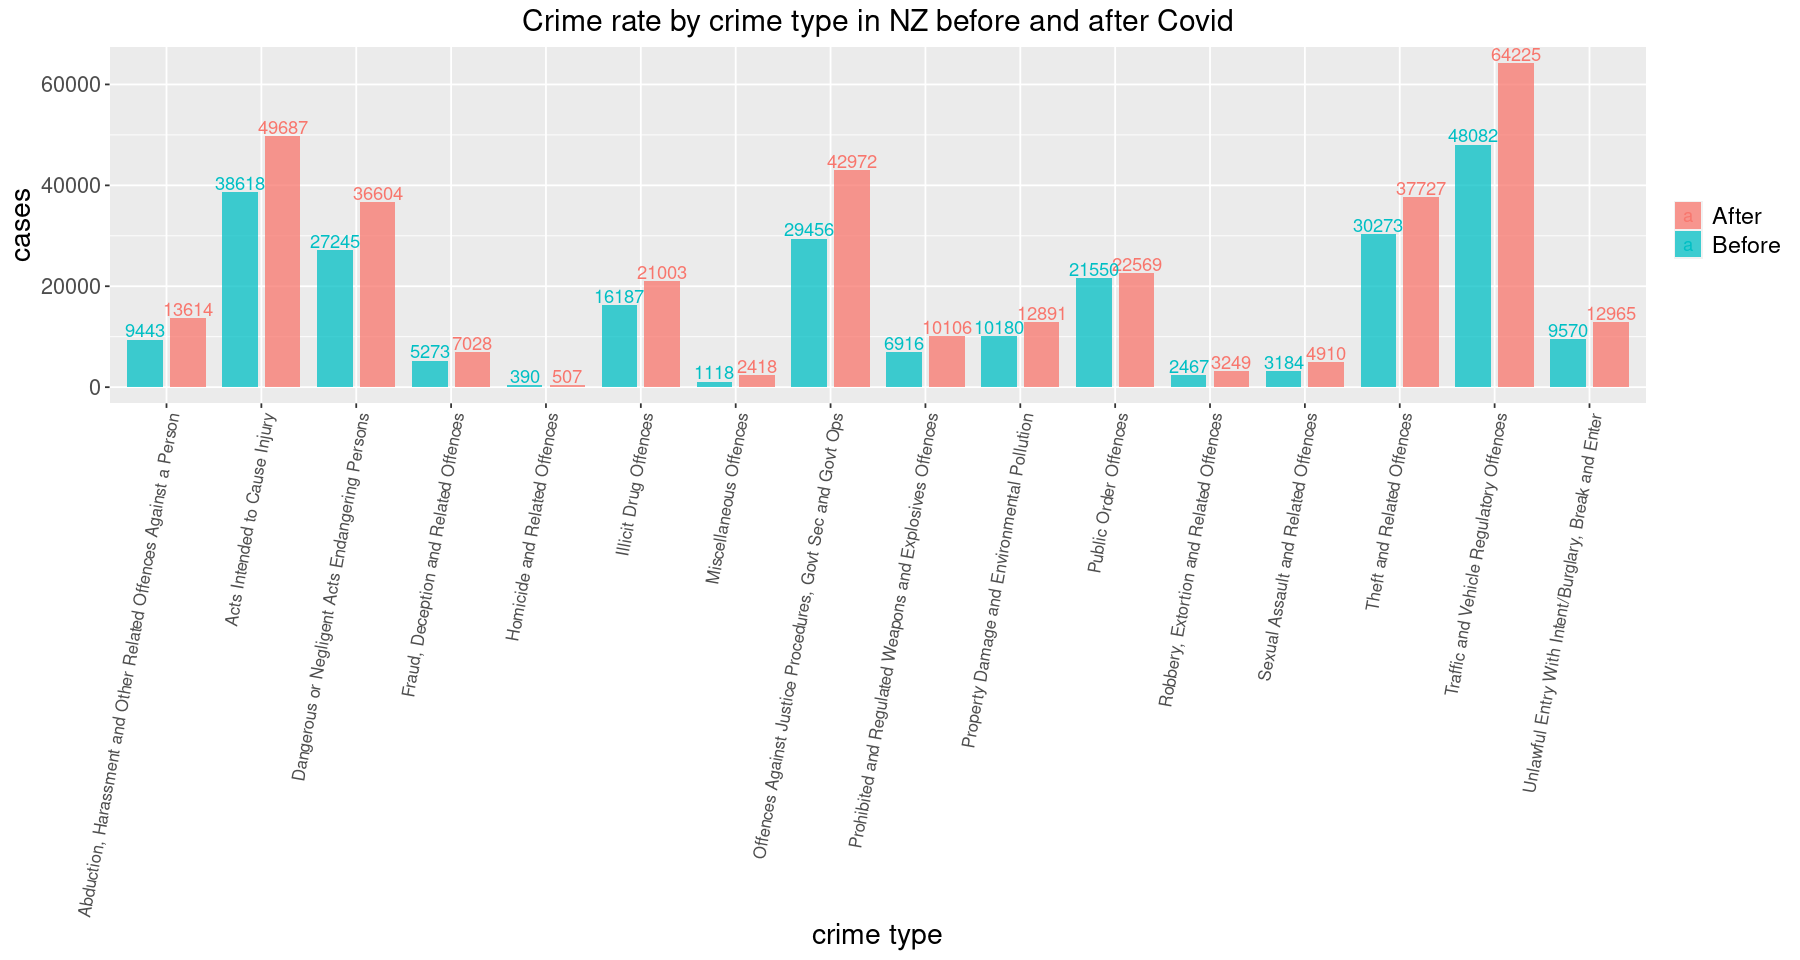

In [40]:
# Create a bar chart about crime rate by crime type before and after covid
crime_type_data_graph <- crime_type_data %>%
        ggplot(aes(x=type, y=cases, fill=period)) + 
        ggtitle('Crime rate by crime type in NZ before and after Covid') + 
        geom_bar(stat = "identity", position = position_dodge(width = -0.9), alpha = 0.75, size = 0.5, width = 0.75) +
        geom_text(aes(label=cases, color = period), position=position_dodge(width = -0.9), vjust=-0.15) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(angle = 80, vjust = 1, hjust = 1, size=10),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) +  
        xlab("crime type") + ylab("cases")
crime_type_data_graph

In [41]:
# ggsave(filename = "Crime rate by crime type in NZ before and after Covid.png", crime_type_data_graph, width = 70, height = 40, units = "cm")

# EXTRA
## Tried to show the crime rate on the NZ map

In [42]:
# read shapefile of nz map with region blocks
nz_map = read_sf("../Data/gadm41_NZL_1.shp")
nz_map$NAME_1

[1] "Auckland"          "Bay of Plenty"     "Canterbury"       
 [4] "Chatham Islands"   "Gisborne"          "Hawke's Bay"      
 [7] "Manawatu-Wanganui" "Marlborough"       "Nelson"           
[10] "Northern Islands"  "Northland"         "Otago"            
[13] "Southern Islands"  "Southland"         "Taranaki"         
[16] "Tasman"            "Waikato"           "Wellington"       
[19] "West Coast"

In [43]:
# modify the crime rate data table to match the districts name
total_crime_data_table %<>% filter(period == "After") %>% 
        select(c(district, proceedings)) %>% 
        filter(!row_number() %in% c(1, 2, 4, 5, 6, 8))
sep <- data.frame(district=c("Auckland", "Counties Manukau", "Hawke\'s Bay", "Southern Islands", "Manawatu-Wanganui", "Bay of Plenty"),
        proceedings=c(16440, 22945, 14909, 12653, 19150, 22945))
total_crime_data_table %<>% rbind(sep)
total_crime_data_table

district,proceedings
<chr>,<dbl>
Canterbury,33079
Northland,16668
Tasman,15457
Waikato,31994
Waitemata,25189
Wellington,29541
Auckland,16440
Counties Manukau,22945
Hawke's Bay,14909


In [44]:
# Get the crime rate data that two table can match district
crime_rate_table <- total_crime_data_table %>% 
  filter(district %in% nz_map$NAME_1) %>%
  group_by(district) %>%
  summarise(crime_rate = proceedings/sum(total_crime_data_table$proceedings))

nz_map$crime_rate <- crime_rate_table$crime_rate[match(nz_map$NAME_1, crime_rate_table$district)]
crime_rate_table

district,crime_rate
<chr>,<dbl>
Auckland,0.06299575
Bay of Plenty,0.08792198
Canterbury,0.12675403
Hawke's Bay,0.05712917
Manawatu-Wanganui,0.07338008
Northland,0.06386941
Southern Islands,0.04848450
Tasman,0.05922903
Waikato,0.12259647


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”
Warning message:
“position_dodge requires non-overlapping x intervals”


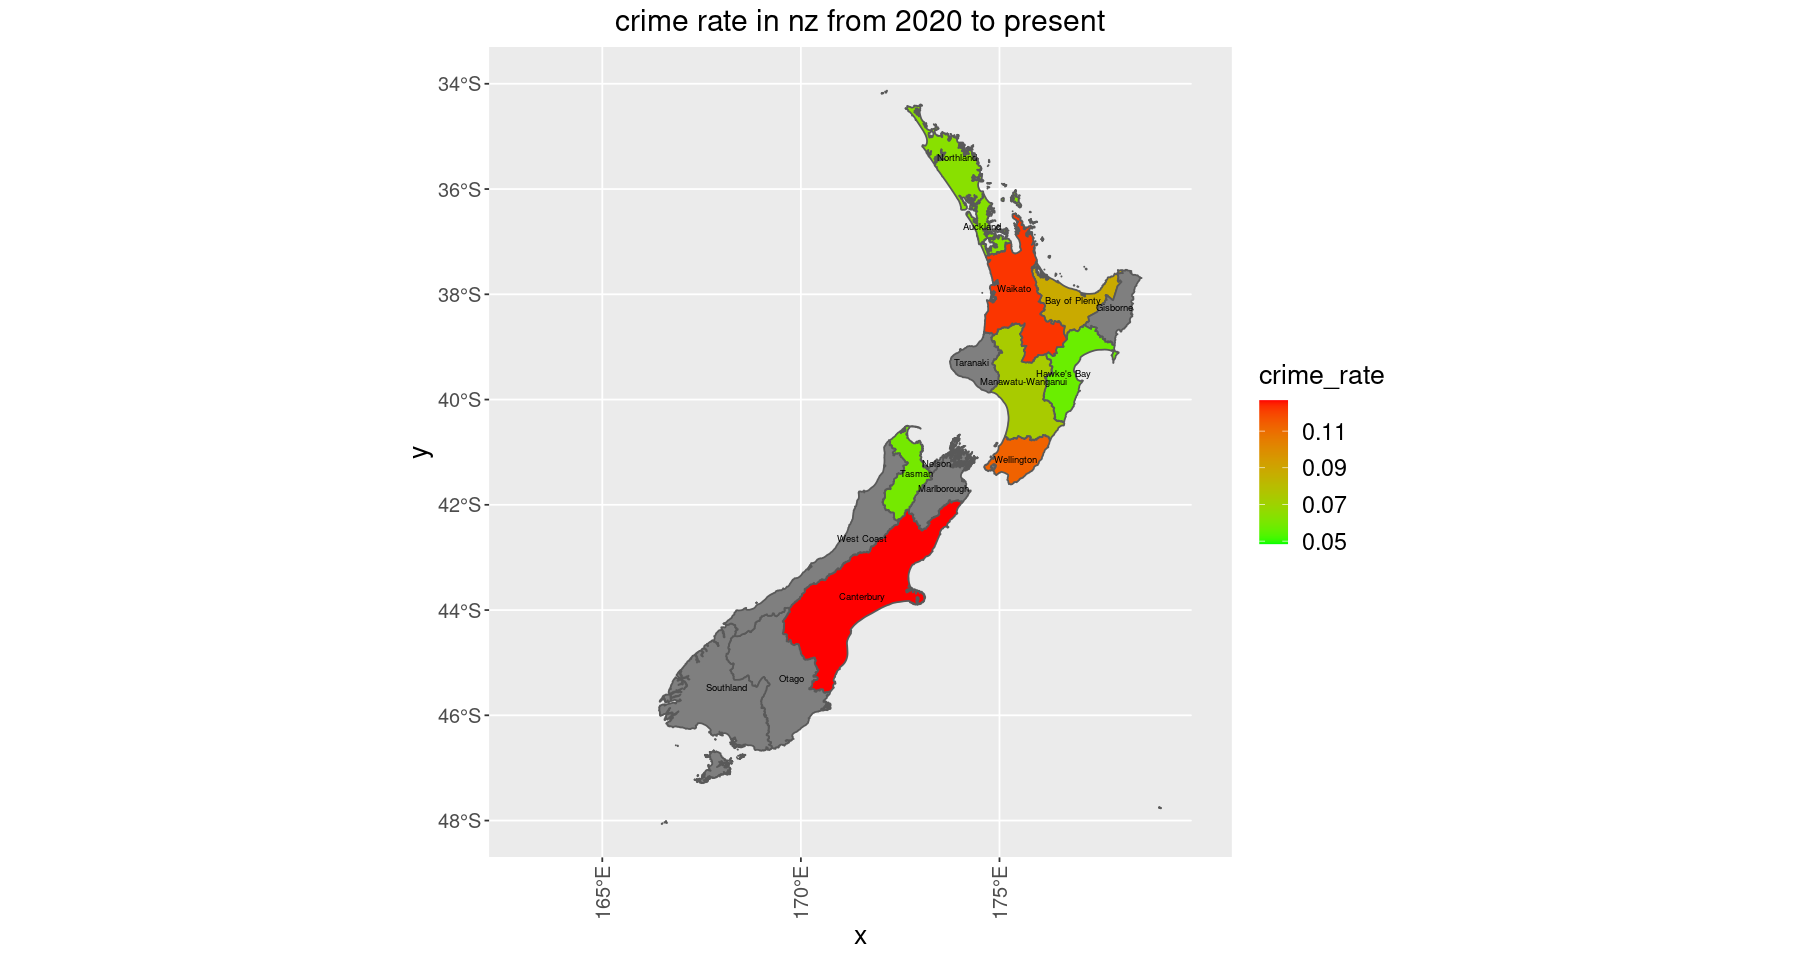

In [45]:
# display the crime rate by region on map, green means low crime rate and so is opposite to red 
crime_rate_map <- ggplot(nz_map) + 
    geom_sf(aes(fill = crime_rate)) +
    ggtitle("crime rate in nz from 2020 to present") +
    coord_sf(xlim = c(163,180),
            ylim = c(-48,-34)) +
    geom_sf_text(aes(label = NAME_1), position=position_dodge(1.7), size=2) +
    theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title = element_text(size=16),
              legend.position = "right", 
              legend.text = element_text(size=14)) +
    scale_fill_gradient(low = "green", high = "red")

crime_rate_map

In [46]:
# ggsave(filename = "crime rate in nz from 2020 to present.png", crime_rate_map, width = 70, height = 40, units = "cm")